In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

### Reference - https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

# Hough Transform - Detect Straight lines

y = mx + c

A line is a single point in parameter space (m, c)

Hessel Normal form - r = x.cos(theta) + y.sin(theta)


In [2]:
im = cv2.imread("line_detection/document2.png")

In [3]:
im.shape

(152, 331, 3)

In [4]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(152, 331)


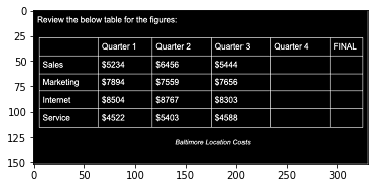

In [5]:
plt.imshow(gray,cmap ="Greys")

In [8]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

# # Apply edge detection method on the image
edges = cv2.Canny(gray,50,150,apertureSize = 3)
# This returns an array of r and theta values
lines = cv2.HoughLines(edges,1,np.pi/180, 200)


In [12]:
lines.shape

(14, 1, 2)

In [15]:


# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines[0]:
	r,theta = r_theta[0], r_theta[1]
	# Stores the value of cos(theta) in a
	a = np.cos(theta)

	# Stores the value of sin(theta) in b
	b = np.sin(theta)
	
	# x0 stores the value rcos(theta)
	x0 = a*r
	
	# y0 stores the value rsin(theta)
	y0 = b*r
	
	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))
	
	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))
	
	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))
	
	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	#drawn. In this case, it is red.
	cv2.line(im,(x1,y1), (x2,y2), (0,0,255),2)
	
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', im)


True

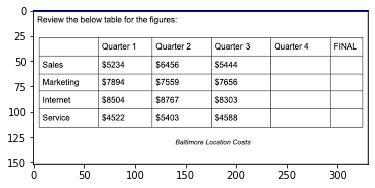

In [16]:
plt.imshow(im)